## Performance 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
ours_naive = "benchmarks/AC300/ours_naive_1robots_infcapacity_AC300.csv"
ours = "benchmarks/AC300/ours_1robots_infcapacity_AC300.csv"
ours_naive_2r = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours_2r = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_2r_df = pd.read_csv(ours_naive_2r)
ours_2r_df = pd.read_csv(ours_2r)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_2r_df.assign(dataset="Point").assign(n_robots="2 robots"),
        ours_2r_df.assign(dataset="Trajectory").assign(n_robots="2 robots"),
    ]
)
sns.set_palette('muted')
sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset",palette="crest")
plt.xlabel('Number of tasks')
plt.ylabel('Total travel time (s)')

plt.legend( title="Estimation method", loc="lower right")
plt.ylim(0)
plt.savefig("point_vs_trajectory_scatter.png")

not_converged = concatenated[concatenated['iterations'] == 200]
naive_not_converged = not_converged[not_converged['dataset'] == "Point"]
ours_not_converged = not_converged[not_converged['dataset'] == "Trajectory"]

print("naive not converged: ", len(naive_not_converged.index) / len(concatenated[concatenated['dataset'] == "Point"].index) * 100, "%" )
print("ours not converged: ", len(ours_not_converged.index) / len(concatenated[concatenated['dataset'] == "Trajectory"].index) * 100, "%")

In [ ]:
ours_naive_df = pd.read_csv("benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv")
ours_naive_1r_df = pd.read_csv("benchmarks/AC300/ours_naive_1robots_infcapacity_AC300.csv")
ours_naive_4r_df = pd.read_csv("benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv")
ours_df = pd.read_csv("benchmarks/AC300/ours_2robots_1200capacity_AC300.csv")
ours_1r_df = pd.read_csv("benchmarks/AC300/ours_1robots_infcapacity_AC300.csv")
ours_4r_df = pd.read_csv("benchmarks/AC300/ours_4robots_600capacity_AC300.csv")

df1 = pd.concat(
    [
        ours_1r_df.assign(dataset="trajectory est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="trajectory est.").assign(n_robots="2 robots"),
        ours_4r_df.assign(dataset="trajectory est.").assign(n_robots="4 robots"),
    ]
)

df2 = pd.concat(
    [
        ours_naive_1r_df.assign(dataset="trajectory est.").assign(n_robots="1 robot"),
        ours_naive_df.assign(dataset="trajectory est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="trajectory est.").assign(n_robots="4 robots"),
    ]
)

# Combine the two DataFrames into one
df = pd.concat([df1, df2], keys=['trajectory est.', 'point est.']).reset_index()

# Divide the DataFrame into bins of size 5
bins = range(20, 199, 20)
labels = [f'{i}' for i in bins[:-1]]
df['group'] = pd.cut(df['num_tasks'], bins=bins, labels=labels)

# Create a pivot table to calculate the mean income for each age group and dataset
pivot_df = pd.pivot_table(df, values='totalRouteCosts', index='group', columns='level_0', aggfunc='mean')

# Create a stacked bar chart with error bars using seaborn

sns.barplot(x=pivot_df.index, y=pivot_df['point est.'], color=(0.2823529411764706, 0.47058823529411764, 0.8156862745098039), label='point est.')
sns.barplot(x=pivot_df.index, y=pivot_df['trajectory est.'], color=(0.9333333333333333, 0.5215686274509804, 0.2901960784313726), label='trajectory est.')

plt.xlabel('Number of tasks')
plt.ylabel('Mean of total travel time (s)')
plt.legend()
plt.show()


In [ ]:
# Calculate the performance increase between naive and ours
print("ours: ",df2["totalRouteCosts"].mean(),df2["totalRouteCosts"].std()*100 /df2["totalRouteCosts"].mean())
print("ours: ",df1["totalRouteCosts"].mean(),df1["totalRouteCosts"].std()*100 / df1["totalRouteCosts"].mean())

print("Improvement over poiont: ", (df2["totalRouteCosts"].mean()-df1["totalRouteCosts"].mean())/df2["totalRouteCosts"].mean()*100)

In [ ]:
ours_naive = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='trajectory est.')])

sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset")

## Convergence

In [ ]:
# ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
# ours = "benchmarks/ours_4robots_600capacity_AC300.csv"
ours_naive = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='trajectory est.')])
sns.set_palette('muted')

plt.ylim(0, 100)
sns.scatterplot(data=concatenated, x="num_tasks", y="iterations", hue="dataset")

# Merge the two DataFrames on the 'Key' column
merged_df = pd.merge(ours_naive_df, ours_df, on='dataset_name', suffixes=('_ours', '_naive'))

print("ours iteration mean", ours_df["iterations"].mean())
print("ours iteration std", ours_df["iterations"].std())
print("naive iteration mean",ours_naive_df["iterations"].mean())
print("naive iteration std",ours_naive_df["iterations"].std())

## Computation time

In [ ]:

ours_naive = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_df.assign(dataset="trajectory est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="trajectory est.").assign(n_robots="4 robots"),
    ]
)

sns.scatterplot(data=concatenated, x="num_tasks", y="computeTime", hue="dataset", style="n_robots")
plt.xlim(0, 100)
plt.ylim(0, 1000)


## Iteration comparison

In [ ]:
# TODO compare the sum of the costs of all the routes with the routes generated by agarwal
# BUT be 100% clear about the difference in colision checking
two_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_2robots_1200capacity_repeat30_VM25_13.csv")
three_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_3robots_800capacity_repeat30_VM25_13.csv")
four_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_4robots_480capacity_repeat30_VM25_13.csv")
five_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_5robots_400capacity_repeat30_VM25_13.csv")
eight_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_8robots_400capacity_repeat30_VM25_13.csv")

concatenated = pd.concat(
    [
        two_robot_30_samples[two_robot_30_samples['iterations'] != 200],
        three_robot_30_samples[three_robot_30_samples['iterations'] != 200],
        four_robot_30_samples[four_robot_30_samples['iterations'] != 200],
        five_robot_30_samples[five_robot_30_samples['iterations'] != 200],
        eight_robot_30_samples[eight_robot_30_samples['iterations'] != 200],
    ]
)
sns.set_palette('muted')

fig = sns.boxplot(data=concatenated,x="number_of_agents", y="iterations")
fig.set(xlabel='Number of agents', ylabel='Number of iterations')


## Cost Comp

In [ ]:
# TODO compare the sum of the costs of all the routes with the routes generated by agarwal
# BUT be 100% clear about the difference in colision checking
vm25_13_sota = pd.read_csv("benchmarks/VM25/agarwal_vm25_13.csv")
ours_vm25_13_1robot = pd.read_csv("benchmarks/VM25/ours_1robots_1600capacity_repeat30_VM25_13.csv")
ours_vm25_13_2robot = pd.read_csv("benchmarks/VM25/ours_2robots_1200capacity_repeat30_VM25_13.csv")
ours_vm25_13_3robot = pd.read_csv("benchmarks/VM25/ours_3robots_800capacity_repeat30_VM25_13.csv")
ours_vm25_13_4robot = pd.read_csv("benchmarks/VM25/ours_4robots_480capacity_repeat30_VM25_13.csv")
ours_vm25_13_5robot = pd.read_csv("benchmarks/VM25/ours_5robots_400capacity_repeat30_VM25_13.csv")
r1_mean = ours_vm25_13_1robot['totalRouteLength'].mean()
r1_std = ours_vm25_13_1robot['totalRouteLength'].std()
r2_mean =ours_vm25_13_2robot[ours_vm25_13_2robot['iterations'] != 200]['totalRouteLength'].mean()
r2_std = ours_vm25_13_2robot[ours_vm25_13_2robot['iterations'] != 200]['totalRouteLength'].std()
r3_mean =ours_vm25_13_3robot[ours_vm25_13_3robot['iterations'] != 200]['totalRouteLength'].mean()
r3_std = ours_vm25_13_3robot[ours_vm25_13_3robot['iterations'] != 200]['totalRouteLength'].std()
r4_mean = ours_vm25_13_4robot[ours_vm25_13_4robot['iterations'] != 200]['totalRouteLength'].mean()
r4_std = ours_vm25_13_4robot[ours_vm25_13_4robot['iterations'] != 200]['totalRouteLength'].std()
r5_mean = ours_vm25_13_5robot[ours_vm25_13_5robot['iterations'] != 200]['totalRouteLength'].mean()
r5_std = ours_vm25_13_5robot[ours_vm25_13_5robot['iterations'] != 200]['totalRouteLength'].std()
print("r1 mean: ", r1_mean," within state of the art: ", (vm25_13_sota["Sum of Costs of Routes"][0] - r1_mean) / vm25_13_sota["Sum of Costs of Routes"][0] * 100, " with ", r1_std/r1_mean * 100 ,"% confidence")
print("r2 mean: ", r2_mean," within state of the art: ", (vm25_13_sota["Sum of Costs of Routes"][1] - r2_mean) / vm25_13_sota["Sum of Costs of Routes"][1] * 100, " with ", r2_std/r2_mean * 100 ,"% confidence")
print("r3 mean: ", r3_mean," within state of the art: ", (vm25_13_sota["Sum of Costs of Routes"][2] - r3_mean) / vm25_13_sota["Sum of Costs of Routes"][2] * 100, " with ", r3_std/r3_mean * 100 ,"% confidence")
print("r4 mean: ", r4_mean," within state of the art: ", (vm25_13_sota["Sum of Costs of Routes"][3] - r4_mean) / vm25_13_sota["Sum of Costs of Routes"][3] * 100, " with ", r4_std/r4_mean * 100 ,"% confidence")
print("r5 mean: ", r5_mean," within state of the art: ", (vm25_13_sota["Sum of Costs of Routes"][4] - r5_mean) / vm25_13_sota["Sum of Costs of Routes"][4] * 100, " with ", r5_std/r5_mean * 100 ,"% confidence")

## Max route cost comparrison

Only routes containing 0 to 100 tasks have been used in this experiment. The agents have all been initialized at the same point and has to return to this point when finished. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# Load the data
# ac300_1r = pd.read_csv("benchmarks/AC300/trajectory_1robots_infcapacity_AC300.csv")
ac300_2r = pd.read_csv("experiments/2robots_1500capacity_AC300.csv")
ac300_4r = pd.read_csv("experiments/4robots_750capacity_AC300.csv")
ac300_6r = pd.read_csv("experiments/6robots_500capacity_AC300.csv")
ac300_8r = pd.read_csv("experiments/8robots_375capacity_AC300.csv")
ac300_10r = pd.read_csv("experiments/10robots_300capacity_AC300.csv")
ac300_12r = pd.read_csv("experiments/12robots_300capacity_AC300.csv")
ac300_14r = pd.read_csv("experiments/14robots_300capacity_AC300.csv")

# Load the point data
ac300_2r_point = pd.read_csv("benchmarks/AC300/point_2robots_1000capacity_AC300.csv")
ac300_4r_point = pd.read_csv("benchmarks/AC300/point_4robots_500capacity_AC300.csv")
ac300_6r_point = pd.read_csv("benchmarks/AC300/point_6robots_400capacity_AC300.csv")
ac300_8r_point = pd.read_csv("benchmarks/AC300/point_8robots_300capacity_AC300.csv")
ac300_10r_point = pd.read_csv("benchmarks/AC300/point_10robots_200capacity_AC300.csv")
ac300_12r_point = pd.read_csv("benchmarks/AC300/point_12robots_200capacity_AC300.csv")
ac300_14r_point = pd.read_csv("benchmarks/AC300/point_14robots_200capacity_AC300.csv")

point_concatenated =pd.concat([ac300_2r_point, ac300_4r_point, ac300_6r_point, ac300_8r_point, ac300_10r_point, ac300_12r_point,ac300_14r_point]) 
concatenated = pd.concat([ac300_2r, ac300_4r, ac300_6r, ac300_8r, ac300_10r, ac300_12r, ac300_14r])

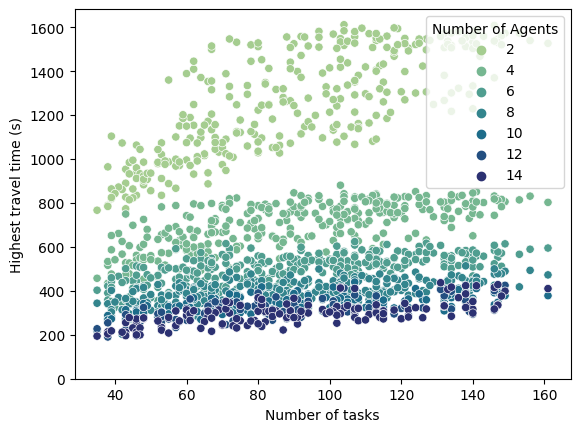

In [2]:
# plot the highest route costs
sns.scatterplot(data=concatenated, x="num_tasks", y="maxRouteCost", hue="number_of_agents",palette="crest")
plt.ylim(0)
plt.legend( title="Number of Agents", loc="upper right")
plt.xlabel('Number of tasks')
plt.ylabel('Highest travel time (s)')
plt.savefig("highest_travel_time_scatter.png")

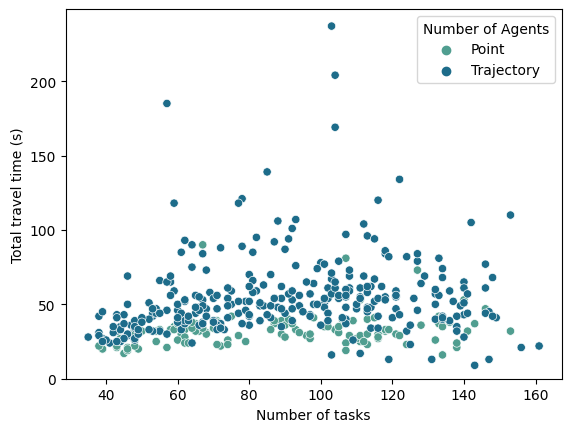

In [7]:
# Plot the total route cost
sns.scatterplot(data=pd.concat([ac300_2r_point.assign(dataset='Point'),ac300_2r.assign(dataset='Trajectory')]), x="num_tasks", y="totalRouteCosts", hue="dataset",palette="crest")
plt.xlabel('Number of tasks')
plt.ylabel('Total travel time (s)')
plt.legend( title="Number of Agents")
plt.ylim(0)
plt.savefig("total_route_cost_scatter.png")

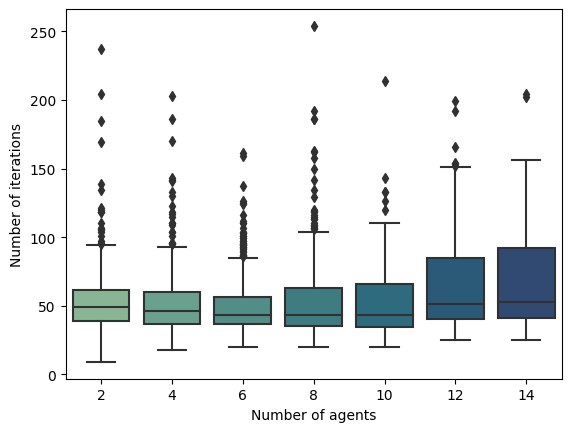

In [6]:
fig = sns.boxplot(data=concatenated,x="number_of_agents", y="iterations",palette="crest")
plt.xlabel('Number of agents')
plt.ylabel('Number of iterations')
plt.savefig("iterations_agents_boxplot.png")